In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
path = 'D:\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'
df = pd.DataFrame()
files = [file for file in os.listdir('D:\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]
for file in files:
    newfile = pd.read_csv(path+"/"+file)
    df  = pd.concat([df,newfile])

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [3]:
df.shape

(186850, 6)

# Data Cleaning

In [4]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
df[df['Order ID'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(inplace = True)
df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3276,179695,Lightning Charging Cable,1,14.95,04/19/19 13:10,"695 Washington St, Los Angeles, CA 90001"
3602,165435,27in FHD Monitor,1,149.99,03/10/19 20:02,"668 Center St, San Francisco, CA 94016"
18538,313373,Vareebadd Phone,1,400,12/30/19 21:16,"991 1st St, Los Angeles, CA 90001"
8012,286462,Apple Airpods Headphones,1,150,11/20/19 21:02,"48 5th St, Los Angeles, CA 90001"
6727,156919,AAA Batteries (4-pack),1,2.99,02/19/19 17:03,"924 Willow St, New York City, NY 10001"
6417,168132,Bose SoundSport Headphones,1,99.99,03/13/19 20:44,"820 River St, Seattle, WA 98101"
12952,291169,Wired Headphones,3,11.99,11/01/19 21:30,"228 Highland St, Boston, MA 02215"
17179,312080,Flatscreen TV,1,300,12/20/19 21:52,"665 Cherry St, San Francisco, CA 94016"
8224,169859,27in FHD Monitor,1,149.99,03/14/19 11:00,"748 Church St, New York City, NY 10001"
20188,314954,AAA Batteries (4-pack),2,2.99,12/05/19 20:19,"316 Wilson St, San Francisco, CA 94016"


In [7]:
df.columns = ['order_id','product','quantity','price','order_date','address']
df

,order_id,product,quantity,price,order_date,address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [8]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['month'] = df['order_date'].dt.month_name()
df['day'] = df['order_date'].dt.day_name()
df['day'] = df['order_date'].dt.day_name()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   order_id    186305 non-null  object        
 1   product     186305 non-null  object        
 2   quantity    186305 non-null  object        
 3   price       186305 non-null  object        
 4   order_date  185950 non-null  datetime64[ns]
 5   address     186305 non-null  object        
 6   month       185950 non-null  object        
 7   day         185950 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 12.8+ MB


In [10]:
df[df['month'].isna()]

,order_id,product,quantity,price,order_date,address,month,day
519,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
1155,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
2878,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
2893,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
...,...,...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
10387,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
11399,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN
11468,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN


In [11]:
df.dropna(inplace= True)

In [12]:
df['quantity'] =df['quantity'].astype('int32')
df['price'] =df['price'].astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   order_id    185950 non-null  object        
 1   product     185950 non-null  object        
 2   quantity    185950 non-null  int32         
 3   price       185950 non-null  float64       
 4   order_date  185950 non-null  datetime64[ns]
 5   address     185950 non-null  object        
 6   month       185950 non-null  object        
 7   day         185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 12.1+ MB


In [14]:
df['month'].unique()

array(['April', 'May', 'August', 'September', 'December', 'January',
       'February', 'March', 'July', 'June', 'November', 'October'],
      dtype=object)

In [15]:
df.duplicated().sum()

264

In [16]:
df.drop_duplicates(inplace = True)

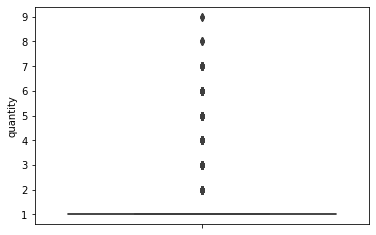

In [17]:
sns.boxplot(y= df['quantity'])

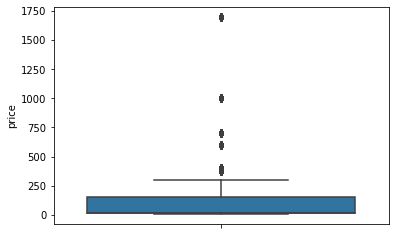

In [18]:
sns.boxplot(y= df['price'])

In [19]:
df[df['price'] >=1000]['product'].value_counts()

Macbook Pro Laptop    4721
Name: product, dtype: int64

In [20]:
df['total_sales'] = df['quantity'] * df['price']
df

,order_id,product,quantity,price,order_date,address,month,day,total_sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Friday,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Sunday,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Tuesday,11.99
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,Tuesday,8.97
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,Sunday,700.00
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,Monday,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,Thursday,379.99


In [21]:
df[['st','city','zipcode']] = df['address'].str.split(',',expand = True)

In [22]:
df

,order_id,product,quantity,price,order_date,address,month,day,total_sales,st,city,zipcode
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Friday,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Sunday,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Tuesday,11.99,333 8th St,Los Angeles,CA 90001
...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,Tuesday,8.97,840 Highland St,Los Angeles,CA 90001
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,Sunday,700.00,216 Dogwood St,San Francisco,CA 94016
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,Monday,700.00,220 12th St,San Francisco,CA 94016
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,Thursday,379.99,511 Forest St,San Francisco,CA 94016


# Analysis

### what is the best month for sales?

In [23]:
salespermonth = df.groupby('month')['total_sales'].sum().reset_index().sort_values(by = 'total_sales',ascending = False)
salespermonth

,month,total_sales
2,December,4.608296e+06
10,October,3.734778e+06
0,April,3.389218e+06
9,November,3.197875e+06
8,May,3.150616e+06
7,March,2.804973e+06
5,July,2.646461e+06
6,June,2.576280e+06
1,August,2.241083e+06
3,February,2.200078e+06


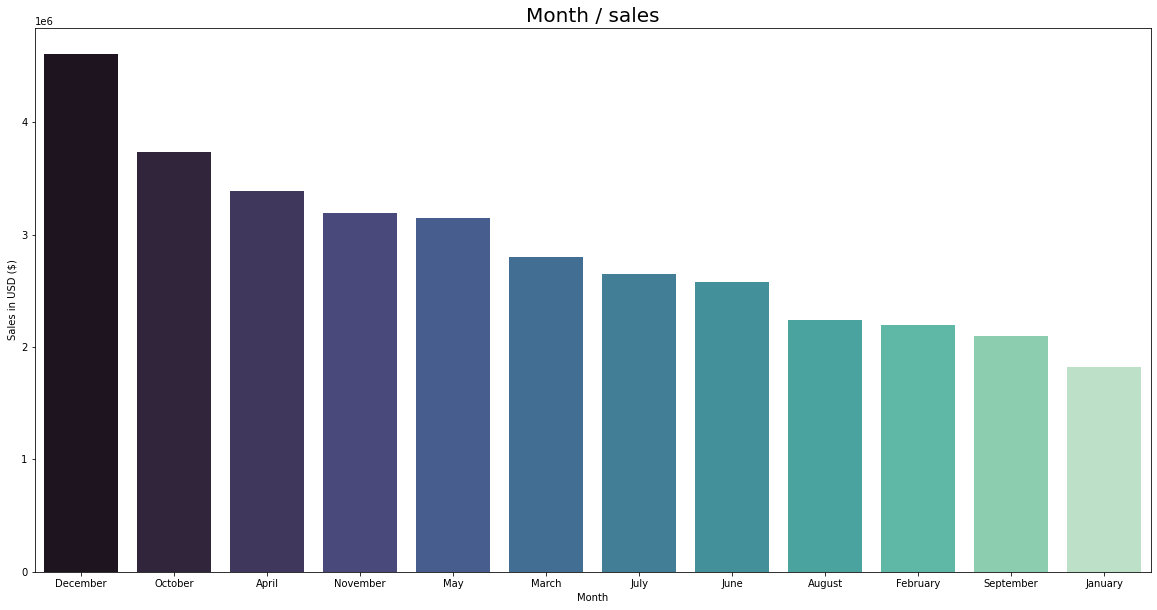

In [24]:
plt.figure(figsize=(20,10))
plt.title('Month / sales',fontsize=20)
sns.barplot(x = 'month',y = 'total_sales',data = salespermonth,palette = 'mako')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()


### What city sold the most product?

In [25]:
salespercity = df.groupby('city')['total_sales'].count().reset_index().sort_values(by = 'total_sales',ascending = False)
salespercity

,city,total_sales
7,San Francisco,44662
4,Los Angeles,29564
5,New York City,24847
2,Boston,19901
0,Atlanta,14863
3,Dallas,14797
8,Seattle,14713
6,Portland,12449
1,Austin,9890


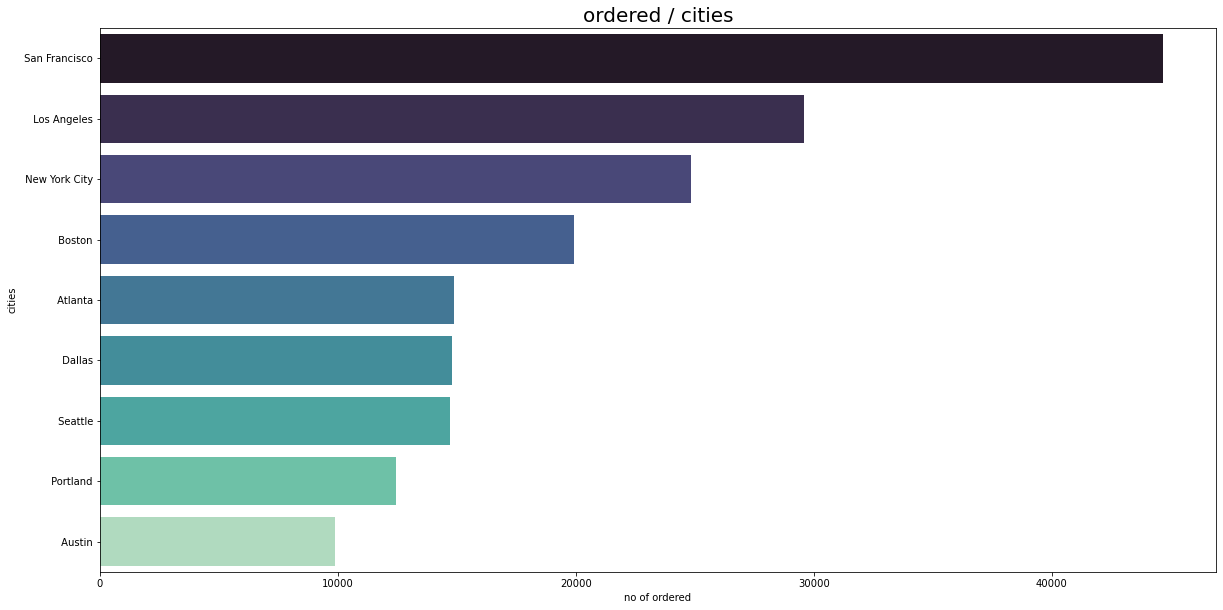

In [26]:
plt.figure(figsize=(20,10))
plt.title('ordered / cities',fontsize=20)
sns.barplot(y = 'city',x = 'total_sales',data = salespercity,palette = 'mako')
plt.xlabel('no of ordered')
plt.ylabel('cities')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [27]:
df['hour'] = df['order_date'].dt.hour
df

,order_id,product,quantity,price,order_date,address,month,day,total_sales,st,city,zipcode,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Friday,23.90,917 1st St,Dallas,TX 75001,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Sunday,99.99,682 Chestnut St,Boston,MA 02215,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,600.00,669 Spruce St,Los Angeles,CA 90001,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,11.99,669 Spruce St,Los Angeles,CA 90001,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Tuesday,11.99,333 8th St,Los Angeles,CA 90001,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,Tuesday,8.97,840 Highland St,Los Angeles,CA 90001,20
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,Sunday,700.00,216 Dogwood St,San Francisco,CA 94016,16
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,Monday,700.00,220 12th St,San Francisco,CA 94016,7
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,Thursday,379.99,511 Forest St,San Francisco,CA 94016,17


In [45]:
hourspersalees = df.groupby('hour')['quantity'].count().reset_index()


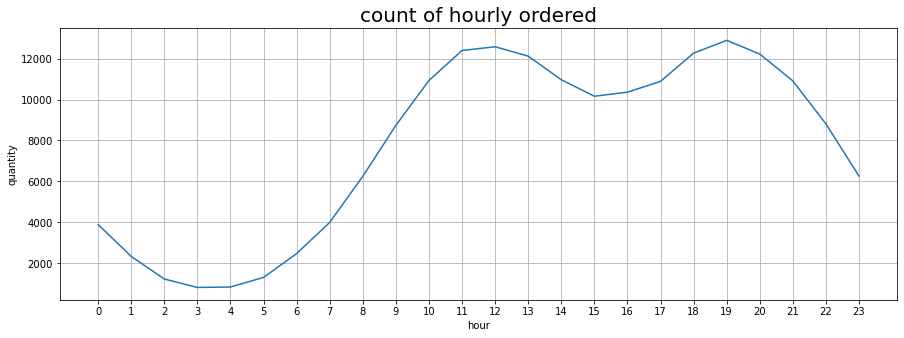

In [66]:
plt.figure(figsize =(15,5))
sns.lineplot(data= hourspersalees, x = 'hour',y = 'quantity')
plt.title('count of hourly ordered',fontsize=20)
plt.xticks(hourspersalees['hour'])
plt.grid()
plt.show()

### What product sold the most?

In [56]:
productpersalees = df.groupby('product')['quantity'].sum().reset_index().sort_values(by = 'quantity',ascending = False)
productpersalees

,product,quantity
5,AAA Batteries (4-pack),30986
4,AA Batteries (4-pack),27615
15,USB-C Charging Cable,23931
12,Lightning Charging Cable,23169
17,Wired Headphones,20524
6,Apple Airpods Headphones,15637
7,Bose SoundSport Headphones,13430
2,27in FHD Monitor,7541
18,iPhone,6847
1,27in 4K Gaming Monitor,6239


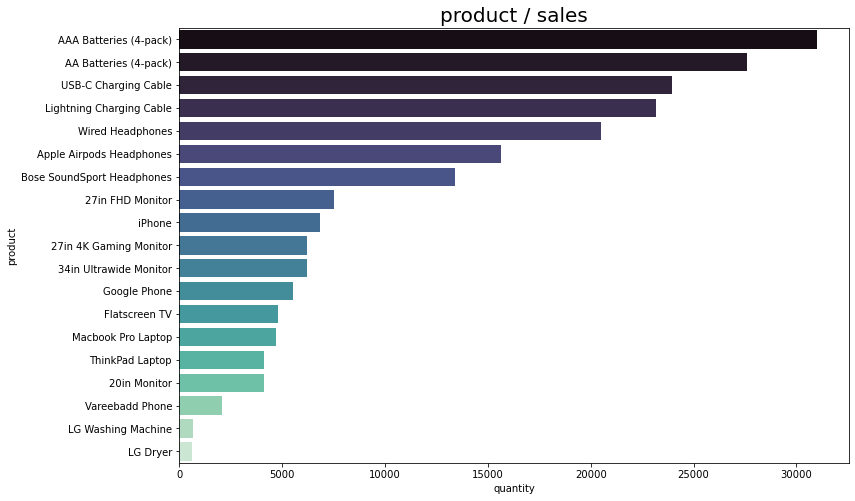

In [89]:
plt.figure(figsize=(12,8))
plt.title('product / sales',fontsize=20)
ax = sns.barplot(x = 'quantity',y = 'product',data = productpersalees,palette = 'mako')
plt.show()